In [14]:
import math
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from model import SVD
from util import load_data
from util import load_similarities
from util import generate_artificial_ratings
import matplotlib.pyplot as plt

In [2]:
similarities = load_similarities()

Loading similarities...
Loading similarities completed in:  0:02:08.979926


In [3]:
result = {}
for data_removed in [.99, .95, .80, .60, .40, .20]:
    train_set, test_set, sparcity = load_data(data_removed=data_removed)
    artificial_ratings = generate_artificial_ratings(train_set, test_set, similarities)
    
    # Baseline model
    print("Baseline model")
    baseline_algo = SVD()
    baseline_algo.fit(train_set)
    
    baseline_algo_predictions = baseline_algo.test(test_set)
    baseline_algo_rmse = math.sqrt(mean_squared_error(baseline_algo_predictions[:, 0],
                                                      baseline_algo_predictions[:, 1]))
    print("RMSE: %.4f" % baseline_algo_rmse)
    
    print("\nModel based on artificial data")
    artificial_algo = SVD()
    artificial_algo.fit(artificial_ratings)
    
    artificial_algo_predictions = artificial_algo.test(test_set)
    artificial_algo_rmse = math.sqrt(mean_squared_error(artificial_algo_predictions[:, 0],
                                                        artificial_algo_predictions[:, 1]))
    print("RMSE: %.4f" % artificial_algo_rmse)
    
    print("\nTwo separate models")
    average_algo_predictions = [(real + artificial) / 2
                            for real, artificial in zip(baseline_algo_predictions[:, 1],
                                                        artificial_algo_predictions[:, 1])]
    average_algo_rmse = math.sqrt(mean_squared_error(artificial_algo_predictions[:, 0],
                                                 average_algo_predictions))
    print("RMSE: %.4f" % average_algo_rmse)

    print("\nOne Combined model with different learning rate for artificial and real ratings")
    combined_ratings = np.vstack((train_set, artificial_ratings))
    np.random.shuffle(combined_ratings)
    combined_algo = SVD()
    combined_algo.fit(combined_ratings)
    
    combined_algo_predictions = combined_algo.test(test_set)
    combined_algo_rmse = math.sqrt(mean_squared_error(combined_algo_predictions[:, 0],
                                                      combined_algo_predictions[:, 1]))
    print("RMSE: %.4f" % combined_algo_rmse)
    
    result[sparcity] = (baseline_algo_rmse, artificial_algo_rmse, average_algo_rmse, combined_algo_rmse)
    print();print()

Loading data...
Loading data completed. Sparcitiy: 0.9968
Loading artificial ratings...
Loading artificial ratings completed in:  0:00:32.203206
Baseline model
Training started...
Artificial Learning rate: 0.00500000
Learning rate: 0.00500000
Training finished in:  0:00:00.312530
RMSE: 1.0496

Model based on artificial data
Training started...
Artificial Learning rate: 0.00500000
Learning rate: 0.00500000
Training finished in:  0:00:39.191419
RMSE: 1.1780

Two separate models
RMSE: 1.0693

One Combined model with different learning rate for artificial and real ratings
Training started...
Artificial Learning rate: 0.00007192
Learning rate: 0.00500000
Training finished in:  0:02:48.146367
RMSE: 1.0531


Loading data...
Loading data completed. Sparcitiy: 0.9874
Loading artificial ratings...
Loading artificial ratings completed in:  0:01:42.230121
Baseline model
Training started...
Artificial Learning rate: 0.00500000
Learning rate: 0.00500000
Training finished in:  0:00:01.283583
RMSE: 1.

In [10]:
for key, item in result.items():
    print(key, item)

0.9968476653178877 (1.049606624610672, 1.1779881719605225, 1.0693218735638714, 1.0531323032018207)
0.987390661271551 (1.0008656616236868, 1.0958600745408367, 1.0162864128771165, 1.017733401842901)
0.9747813225431019 (0.9496602554273043, 1.0218121873655541, 0.956134862032341, 0.9642483440095829)
0.9621719838146529 (0.9579142001210064, 1.0184465565355278, 0.961340737834938, 0.9718560636605873)
0.9495626450862037 (0.9406696315100929, 1.005109043425053, 0.9444555776408374, 0.9469492504617457)
0.9993695330635776 (1.1513498762778875, 1.2442406144878806, 1.1503424875556345, 1.145828292774213)


In [12]:
sparcity = []
rmse = []
for key, value in result.items():
    sparcity.append(key)
    rmse.append(value)
sparcity = np.array(sparcity)
rmse = np.array(rmse)

In [23]:
df = pd.DataFrame(rmse, index=sparcity, columns=["Baseline", "Artificial ratings only", "Average of two models", "Combined model with different learning rates"])
del df["Artificial ratings only"]
df = df.sort_index()

<IPython.core.display.Javascript object>


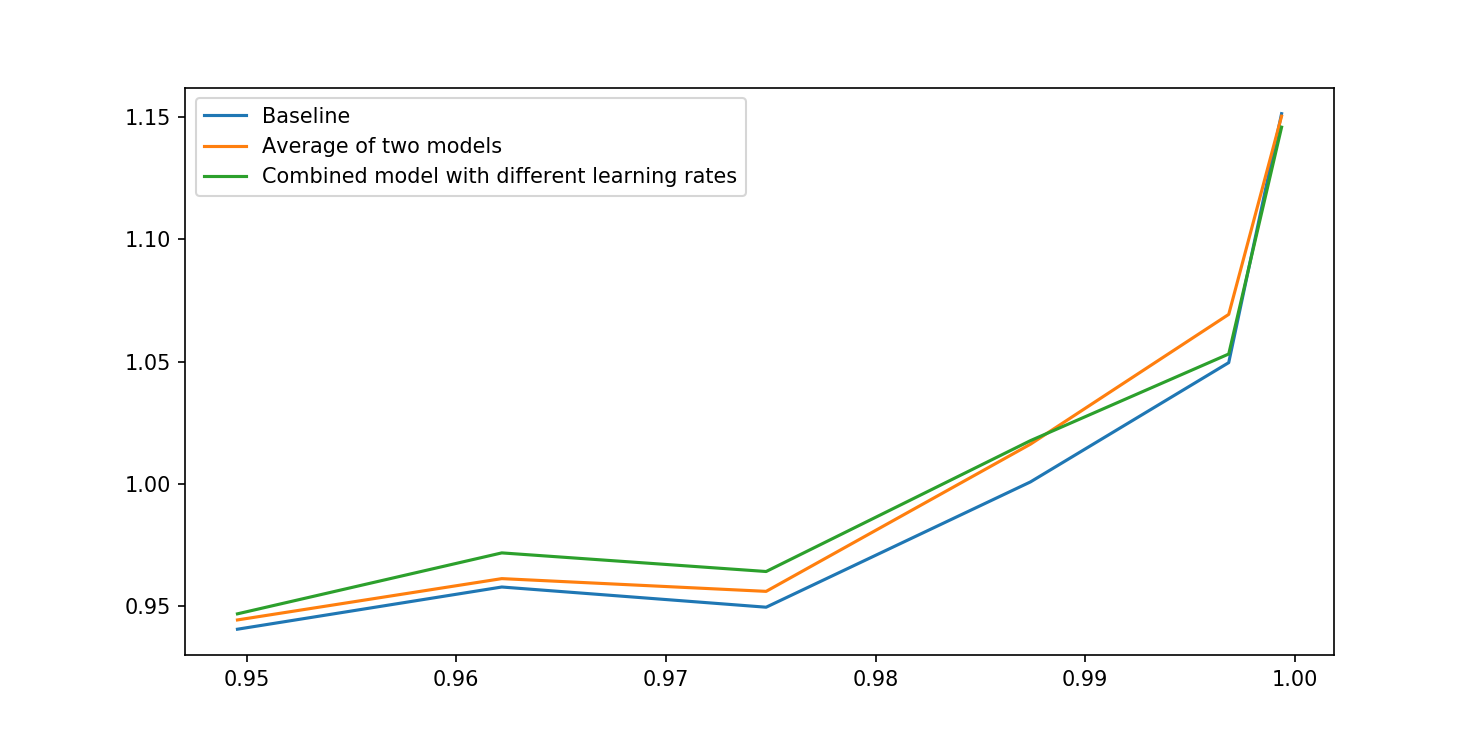

In [39]:
%matplotlib notebook
df.plot();